# Frozen Lake: Environment

In reinforcement learning, an agent is acting in an environment, and learning by trial-and-error to optimize its performance in order to gain maximal cumulative reward. In this notebook the Frozen Lake game is discussed as reinforment learning environment.

## OpenAI Gym

Frozen Lake is one of the OpenAI Gym environments:

https://gym.openai.com/envs/FrozenLake-v0/

<i>"Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following:

<br>
SFFF       (S: starting point, safe)
<br>
FHFH       (F: frozen surface, safe)
<br>
FFFH       (H: hole, fall to your doom)
<br>
HFFG       (G: goal, where the frisbee is located)

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise."</i>


## Import module ReinforcementLearning

A python module "ReinforcementLearning" is developped to define a software agent that learns to play the FrozenLake game applying different reinforcement learning algorithms. This module must be imported first. When importing this module, the "numpy" package is imported as "np" and "matplotlib.pyplot" as "plt". So it is not required to import these packages explicitly. The "ReinforcementLearning" module requires that "matplotlib" is set to the interactive "notebook" plotting mode. 

In [1]:
from ReinforcementLearning import *
%matplotlib notebook

## Creating and Exploring the FrozenLake Environment

It is possible to create a deterministic or a stochastic FrozenLake environment. In the first case, the environment is not slippery and actions are deterministic, meaning that each step puts the cursor in the expected cell of the grid. However, if the environemnt is slippery, the new position of the cursor is unpredictable when taking a new step.

### Deterministic environment 

Construct a new determistic FrozenLake environment object by calling static method "make" of class "FrozenLake" and passing argument "is_slippery" as "False":

In [2]:
env = FrozenLake.make(is_slippery=False)

Class FrozenLake is a wrapper class that wraps the OpenAI Gym "FrozenLake-v0" environment class. The latter is found in attribute "gym_env": 

In [3]:
env.gym_env

<TimeLimit<FrozenLakeEnv<FrozenLake-v0>>>

It is possible to call the wrapped "FrozenLake-v0" object's methods directly or via the "FrozenLake" object's methods with the same name, e.g. method "render" which shows the 4 x 4 grid and the current position indicated by a red cursor:

In [4]:
env.gym_env.render()
env.render() # calls env.gym_env.render()


SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG


The same is true for methods "reset" and "step". 

Method "reset" sets the red cursor to the start position "S" which is equal to state 0. So the possible states are the positions in the grid which are numbered row-wise from 0 to 15. The final state "G" has index  15, and state 6 is the position corresponding to the grid cell in the 2nd row and 3rd column.

Method "step" sets the cursor to a new position in the grid, by moving to the west (left = 0), to the south (down = 1), to the east (right = 2), or to the north (up = 3). These are the 4 possible actions, numbered from 0 to 3.  

Because the environment is deterministic, passing action 1 to method "step" will move the cursor one cell down and the environment's new state is 4:

In [5]:
print(env.gym_env.reset()) # returns the state index
print(env.gym_env.step(1)) # returns a tuple (next_state, reward, done, info)
env.gym_env.render()

0
(4, 0.0, False, {'prob': 1.0})
  (Down)
SFFF
FHFH
FFFH
HFFG


In [6]:
print(env.reset())
print(env.step(1))
env.render()

0
(4, 0.0, False, {'prob': 1.0})
  (Down)
SFFF
FHFH
FFFH
HFFG


The current state is found in attribute "s" of the gym environment, which is also returned by FrozenLake's method "state":

In [7]:
print(env.gym_env.s)
print(env.state())

4
4


The number of states and actions is returned by FrozenLake's attributes "nstates" and "nactions" respectively:

In [8]:
print(env.nstates)
print(env.nactions)

16
4


Class FronzenLake also has a plot method which visualizes the grid in a more attractive way. By passing optional argument "show_state" as True, the current position is plotted by adding a red border to the corresponding grid cell:

<IPython.core.display.Javascript object>


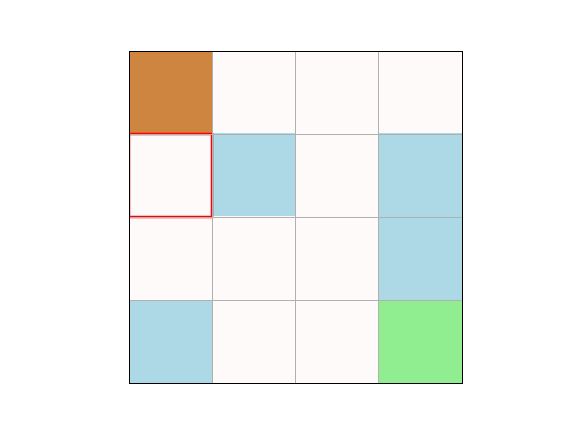

In [9]:
env.plot(show_state=True)

The goal of the game is to reach the terminal state G (index 15) without falling into one of the holes indicated by H. If the environment is not slippery, this is easy to accomplish:

In [10]:
env.step(1)
env.step(2)
env.step(2)
env.step(1)
env.step(2)
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


### Stochastic environment 

If the environment is slippery, reaching the goal is not so easy. In this case, the environment is stochastic, meaning that choosing an action doesn't garantee the cursor will be in the expected position.

A slippery FrozenLake environment is created using the static method "make" of class "FrozenLake":

In [11]:
env = FrozenLake.make()  # is_slippery=True is default

In [12]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


If a step "down" is chosen, there is a probability of merely 33.33% that the new position will be the cell below the start position, and a probability of 66.67% that the cursor will be in another cell.

In [13]:
print(env.step(1))
env.render()

(1, 0.0, False, {'prob': 0.3333333333333333})
  (Down)
SFFF
FHFH
FFFH
HFFG


The probabilities are found in attribute P of the original FrozenLake-v0 object. For state 0 and action 1, the probabilities are:

In [14]:
state = 0
action = 1
env.gym_env.P[state][action]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

The result is a list of 3 tuples (probability, next_state, reward, done). The meaning of these tuples will be explained in more detail when the Markov Decision Process is described.

Finally the game is played by creating a "while" loop in which the next action is chosen randomly:

<IPython.core.display.Javascript object>


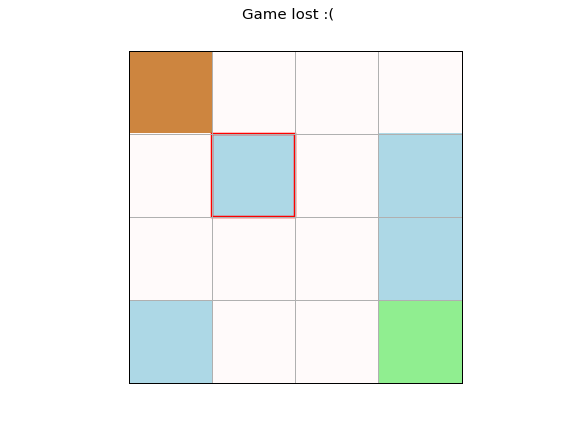

In [15]:
env.reset()

done = False
while not done:
    action = np.random.choice(env.nactions, size=1)
    next_state, reward, done, info = env.step(action.item())

if reward == 1:
    title = "Game won :)"
else:
    title = "Game lost :("
env.plot(show_state=True, title=title)
    


After each step, a reward of zero is given, unless the final state is reached, in which case a reward of 1 is given, meaning that the game is won. The game is lost if the cursor is in a cell corresponding to a hole.

### Environment without time limit 

The original FrozenLake-v0 object is a TimeLimit object wrapping the actual FrozenLakeEnv object to set a time limit. This time limit is defined as a maximum number of steps, which is equal to 100. The unwrapped environment without time constraint is found in attribute "env" of the original FrozenLake-v0 object: 

In [16]:
print(type(env.gym_env))
print(type(env.gym_env.env))

<class 'gym.wrappers.time_limit.TimeLimit'>
<class 'gym.envs.toy_text.frozen_lake.FrozenLakeEnv'>


To play the game without time limit, the optional argument "time_limit" is set to "False" when calling static method "make" of class "FrozenLake": 

In [17]:
env_time_limit = FrozenLake.make(is_slippery=False)  # time_limit is True by default
env_no_time_limit = FrozenLake.make(is_slippery=False, time_limit=False)

"FrozenLake" object "env_time_limit" holds a time limited environment, whereas "FrozenLake" object "env_no_time_limit" has an environment without time limit: 

In [18]:
print(env_time_limit.gym_env)
print(env_no_time_limit.gym_env)

<TimeLimit<FrozenLakeEnv<FrozenLake-v0>>>
<FrozenLakeEnv<FrozenLake-v0>>


The presence or absence of a time limit can be checked easily. A function "play" is defined to which a FrozenLake object is passed. The function continues to take a step to the left while being in the start position of the environment. If the environment is not slippery, the cursor will stay in the start position and the game will never finish, unless there is a time limit. The time limited environment will stop after 100 steps. The environment without time limit will stop after 1000 steps, the maximum number of steps defined by the function: 

In [19]:
def play(env):
    env.reset()
    done = False
    i = 0
    while not done and i < 1000:
        next_state, reward, done, info = env.step(0)
        i += 1
    print(i)

play(env_time_limit)
play(env_no_time_limit)

100
1000


The time limited environment indeed stops after 100 steps, whereas the environment without time limit performs all 1000 steps. In most cases, the time limited environment will be used to avoid getting stuck in an endless loop.